In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
plt.rcParams.update({'font.size': 26})

In [11]:
en_data = pd.read_csv('wikiAPI/datasets/en_04_17.csv')
tr_data = pd.read_csv('wikiAPI/datasets/tr_04_14.csv')

In [12]:
en_data['numtok'] = en_data['text'].apply(lambda x: len(x.split()))
tr_data['numtok'] = tr_data['text'].apply(lambda x: len(x.split()))

In [13]:
en_data

,Unnamed: 0,pageid,title,category,label,language,text,links,numtok
0,0,26700,Science,Science,0,en,Science (from Latin scientia 'knowledge') is ...,"[56661172, 2665685, 6679056]",388
1,1,9145213,Outline of science,Science,0,en,The following outline is provided as a topical...,"[61744455, 52412, 69658254]",99
2,2,70476313,Monochrome-astrophotography-techniques,Science,0,en,Monochrome photography is one of the earliest ...,"[571760, 14092434, 422994]",59
3,3,26997,Scientist,Science,0,en,A scientist is a person who conducts scientifi...,"[56661172, 238212, 19616384]",131
4,4,9145213,Outline of science,Science,0,en,The following outline is provided as a topical...,"[61744455, 52412, 69658254]",99
...,...,...,...,...,...,...,...,...,...
6995,6995,65326971,Pop culture fiction,Entertainment,6,en,Pop culture fiction is a genre of fiction wher...,"[246007, 39973509, 39973509]",34
6996,6996,24145,Pun,Entertainment,6,en,"A pun, also known as paronomasia, is a form of...","[17585982, 38870062, 2986]",122
6997,6997,1311322,Satire boom,Entertainment,6,en,The satire boom was the output of a generation...,"[82767, 167557, 19344654]",382
6998,6998,9765056,Satirical ostraca,Entertainment,6,en,Satirical ostraca are a category of ostraca (s...,"[874, 11039790, 604865]",74


In [14]:
avg_tokens_english = en_data.groupby('category').mean().numtok.sort_values(ascending=False).tolist()

In [15]:
avg_tokens_turkish = tr_data.groupby('category').mean().numtok

In [16]:
avg_tokens_turkish

category
Bilim      82.422
Ekonomi    97.461
Eğitim     91.220
Eğlence    78.324
Sağlık     93.455
Siyaset    86.027
Spor       60.693
Name: numtok, dtype: float64

In [17]:
avg_tokens_english

[165.936, 161.466, 159.112, 149.028, 145.147, 140.021, 120.861]

In [18]:
classes = ['Health / Sağlık', "Politics / Siyaset", "Economy / Ekonomi", "Education / Eğitim", "Science / Bilim", "Entertainment / Eğlence", "Sports / Spor"]
x = np.arange(7)
final_avg_turkish_tokens = []
for c in classes:
    k = c.split(' / ')[1]
    final_avg_turkish_tokens.append(avg_tokens_turkish.loc[k])

In [19]:
avg_tokens_english

[165.936, 161.466, 159.112, 149.028, 145.147, 140.021, 120.861]

In [20]:
final_avg_turkish_tokens

[93.455, 86.027, 97.461, 91.22, 82.422, 78.324, 60.693]

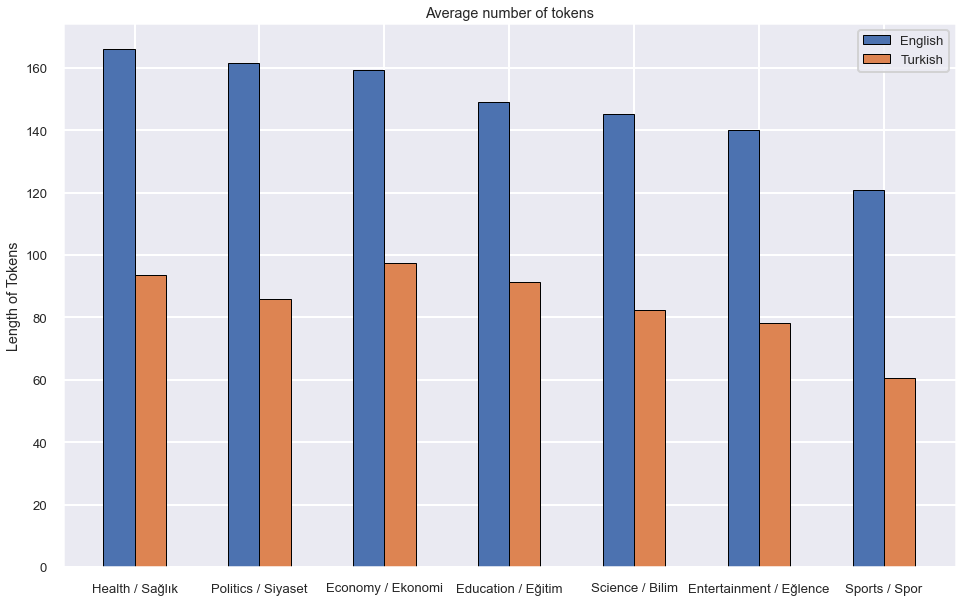

In [21]:
# sns.set_style('whitegrid')
sns.set_context('poster', font_scale = .6)
fig = plt.figure(figsize=(16,10))
plt.bar(x, avg_tokens_english, width=0.25, edgecolor='black', linewidth=1,  label = 'English')
plt.bar(x+0.25, final_avg_turkish_tokens, width=0.25, edgecolor='black', linewidth=1, label = 'Turkish')
plt.xticks(x+0.125, classes)
plt.ylabel('Length of Tokens')
plt.title('Average number of tokens')
plt.legend()
plt.savefig("avgtokens.png")

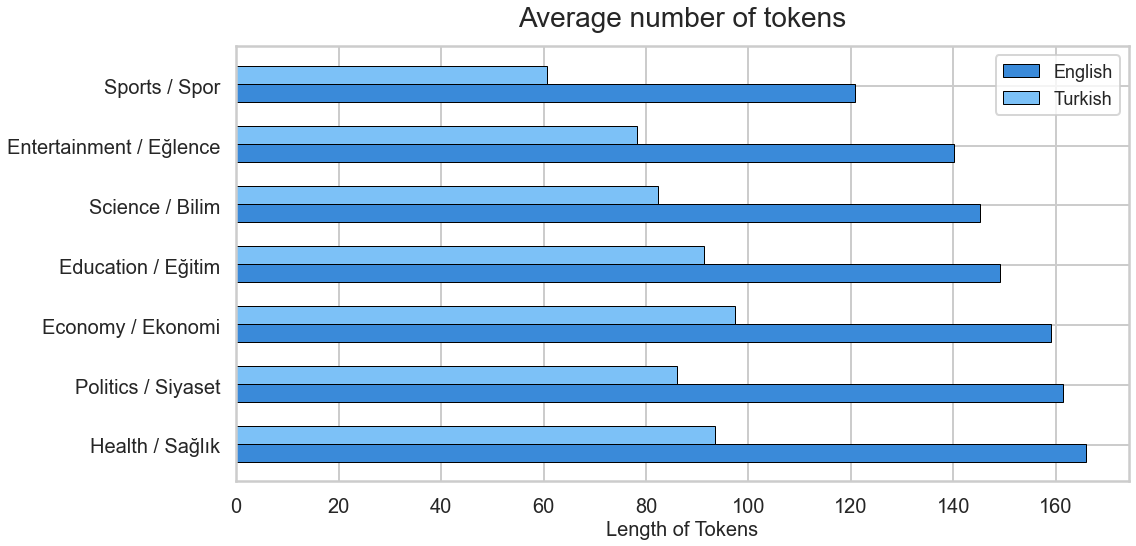

In [131]:
sns.set_style('whitegrid')
sns.set_context('poster', font_scale = .6)
fig = plt.figure(figsize=(16,8))
plt.barh(x, avg_tokens_english, height=0.3, edgecolor='black', linewidth=1,  label = 'English',align='center', color = '#3A8AD9')
plt.barh(x+0.3, final_avg_turkish_tokens, height=0.3, edgecolor='black', linewidth=1, label = 'Turkish',align='center',color = '#7CC1F7')
plt.yticks(x+0.125, classes, fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Length of Tokens', fontsize=20)
plt.title('Average number of tokens', fontsize=28, pad=20)
plt.legend(prop={'size': 18})
plt.savefig("avgtokensh.png", facecolor='#EBEBEB',bbox_inches = "tight")

In [23]:
cats = en_data['category'].unique().tolist()
results_en = {}
for cat in cats:
    results_en[cat] = len(set(en_data[en_data['category'] == cat].text.str.cat(sep = ' ').split()))

In [24]:
cats = tr_data['category'].unique().tolist()
results_tr = {}
for cat in cats:
    results_tr[cat] = len(set(tr_data[tr_data['category'] == cat].text.str.cat(sep = ' ').split()))

In [25]:
classes2 = ['Entertainment / Eğlence','Politics / Siyaset','Health / Sağlık','Science / Bilim','Economy / Ekonomi','Education / Eğitim','Sports / Spor']
temp = sorted([(k,v) for k,v in results_en.items()], key = lambda x: x[1], reverse=True)
vocab_len_en = [x[1] for x in temp]
vocab_len_tr = []
for c in classes2:
        vocab_len_tr.append(results_tr[c.split(' / ')[1]])

In [26]:
vocab_len_en

[26362, 26218, 25762, 25059, 24506, 21910, 20783]

In [27]:
vocab_len_tr

[26990, 26377, 30983, 29176, 24653, 23845, 18002]

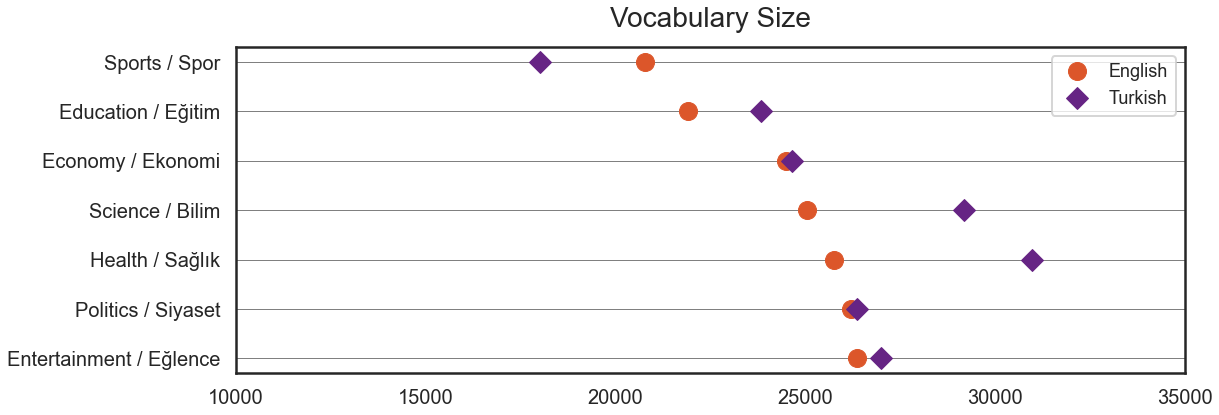

In [130]:
# sns.set_style()
sns.set_style('white')
fig = plt.figure(figsize=(17,6))
plt.xlim(10000,35000)
plt.hlines(x, xmin = 0, xmax = 35000, linewidth=1, color='gray')
plt.plot(vocab_len_en, x,  "o",label = 'English', markersize=18, color='#DC562A')
# plt.hlines(x, xmin = 0, xmax = 35000)
plt.plot(vocab_len_tr,x, "D",label = 'Turkish', color='#662484',markersize=16)
# plt.line(x, vocab_len_en)


plt.yticks(x, classes2, fontsize=20)
plt.xticks(fontsize=20)
# plt.xlabel(, fontsize=20)
plt.title('Vocabulary Size', fontsize=28, pad=20)
plt.legend(prop={'size': 18})
plt.savefig("avgtokenshvocab.png", dpi=300, facecolor='#EBEBEB',bbox_inches = "tight")

In [76]:
classes

['Health / Sağlık',
 'Politics / Siyaset',
 'Economy / Ekonomi',
 'Education / Eğitim',
 'Science / Bilim',
 'Entertainment / Eğlence',
 'Sports / Spor']

In [57]:
en_data21 = pd.read_csv('wikiAPI/datasets/en_04_18.csv')

In [61]:
en_data22 = pd.read_csv('wikiAPI/datasets/en_04_19.csv')

In [62]:
en_data22

,Unnamed: 0,pageid,title,category,label,language,text,links
0,0,22986,Politics,Politics,3,en,"Politics (from Greek: Πολιτικά, politiká, 'aff...","[11887, 265752, 191253, 147885, 10368228, 2015..."
1,1,38211935,Outline of political science,Politics,3,en,The following outline is provided as an overvi...,"[976531, 22986, 16833931, 12229, 7485, 149170,..."
2,2,1710895,Action alert,Politics,3,en,An action alert is a message that an organizat...,[18947898]
3,3,651934,Anti-incumbency,Politics,3,en,Anti-incumbency is sentiment in favor of votin...,"[364022, 43136575, 505825, 31605, 233475, 216170]"
4,4,1414677,Comparative politics,Politics,3,en,Comparative politics is a field in political s...,"[24388, 2041141, 294833, 37123, 148131, 12229]"
...,...,...,...,...,...,...,...,...
995,995,168919,Deliberative democracy,Politics,3,en,Deliberative democracy or discursive democracy...,"[7959, 151350, 265752, 165760, 658906, 23040, ..."
996,996,8467077,Democracy in Marxism,Politics,3,en,"In Marxist theory, a new democratic society wi...","[43069524, 18178, 16743, 47096, 30312, 3858436..."
997,997,46557297,Democratic confederalism,Politics,3,en,Democratic confederalism (Kurdish: Konfederalî...,"[40316, 23040, 69680, 98439, 286947, 227091, 1..."
998,998,412326,Democratic peace theory,Politics,3,en,The democratic peace theory posits that democr...,"[7959, 33158, 9282116, 25755, 43851, 24956, 28..."


In [63]:
en_data_cit = en_data21.append(en_data22)

In [65]:
tr_data_cit = pd.read_csv('wikiAPI/datasets/tr_04_18.csv')

In [103]:
en_data_cit['numcit'] = en_data_cit['links'].apply(lambda x: len(list(filter(lambda x: x!='', x[1:-1].split(', ')))))
tr_data_cit['numcit'] = tr_data_cit['links'].apply(lambda x: len(list(filter(lambda x: x!='', x[1:-1].split(', ')))))

In [104]:
en_data_cit

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,pageid,title,category,label,language,text,links,numcit
0,0,0.0,0.0,0.0,0.0,26700,Science,Science,0,en,Science (from Latin scientia 'knowledge') is ...,"[17730, 26833, 243391, 2691668, 216186, 246066...",60
1,1,1.0,1.0,1.0,1.0,9145213,Outline of science,Science,0,en,The following outline is provided as a topical...,"[976531, 26700, 243391, 20785947, 637990, 3188...",18
2,2,2.0,2.0,2.0,2.0,70476313,Monochrome-astrophotography-techniques,Science,0,en,Monochrome photography is one of the earliest ...,[],0
3,3,3.0,3.0,3.0,3.0,26997,Scientist,Science,0,en,A scientist is a person who conducts scientifi...,"[26833, 11983318, 252905, 23276, 382251, 38890...",18
4,4,4.0,4.0,4.0,4.0,9145213,Outline of science,Science,0,en,The following outline is provided as a topical...,"[976531, 26700, 243391, 20785947, 637990, 3188...",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,NaN,NaN,NaN,NaN,168919,Deliberative democracy,Politics,3,en,Deliberative democracy or discursive democracy...,"[7959, 151350, 265752, 165760, 658906, 23040, ...",10
996,996,NaN,NaN,NaN,NaN,8467077,Democracy in Marxism,Politics,3,en,"In Marxist theory, a new democratic society wi...","[43069524, 18178, 16743, 47096, 30312, 3858436...",38
997,997,NaN,NaN,NaN,NaN,46557297,Democratic confederalism,Politics,3,en,Democratic confederalism (Kurdish: Konfederalî...,"[40316, 23040, 69680, 98439, 286947, 227091, 1...",68
998,998,NaN,NaN,NaN,NaN,412326,Democratic peace theory,Politics,3,en,The democratic peace theory posits that democr...,"[7959, 33158, 9282116, 25755, 43851, 24956, 28...",23


In [110]:
citation_en = en_data_cit.groupby('category').mean().numcit.sort_values(ascending=False).tolist()
citation_en

[14.796, 14.791, 14.658, 12.412, 11.872, 10.014, 9.243]

In [112]:
classes3 = ["Politics / Siyaset", "Economy / Ekonomi",'Health / Sağlık',  "Science / Bilim", "Entertainment / Eğlence", "Sports / Spor","Education / Eğitim"]


In [107]:
citation_tr = tr_data_cit.groupby('category').mean().numcit.sort_values(ascending=False)
citation_tr

category
Siyaset    6.386
Bilim      6.245
Sağlık     5.468
Eğlence    5.240
Eğitim     5.071
Spor       4.596
Ekonomi    4.417
Name: numcit, dtype: float64

In [113]:
x = np.arange(7)
citations_tr_final = []
for c in classes3:
    k = c.split(' / ')[1]
    citations_tr_final.append(citation_tr.loc[k])

In [114]:
citations_tr_final

[6.386, 4.417, 5.468, 6.245, 5.24, 4.596, 5.071]

In [116]:
citation_en

[14.796, 14.791, 14.658, 12.412, 11.872, 10.014, 9.243]

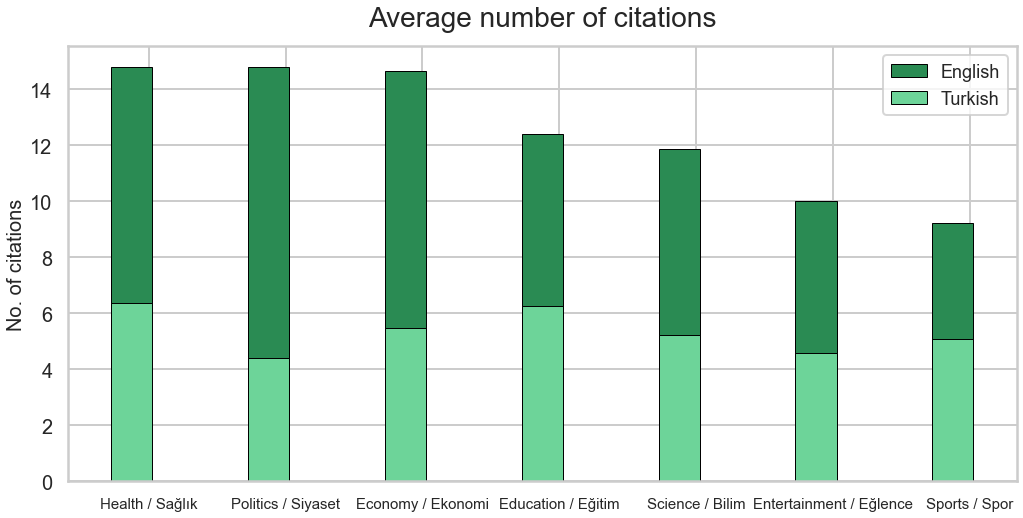

In [128]:
sns.set_style('whitegrid')
sns.set_context('poster', font_scale = .6)
fig = plt.figure(figsize=(17,8))
plt.bar(x, citation_en, width=0.3, edgecolor='black', linewidth=1,  label = 'English',align='center', color = '#2A8B53')
plt.bar(x, citations_tr_final, width=0.3, edgecolor='black', linewidth=1, label = 'Turkish',align='center',color = '#6DD499')
plt.xticks(x+0.125, classes, fontsize=15)
plt.yticks(fontsize=20)
plt.ylabel('No. of citations', fontsize=20)
plt.title('Average number of citations', fontsize=28, pad=20)
plt.legend(prop={'size': 18})
plt.savefig("avgcits.png", facecolor='#EBEBEB',bbox_inches = "tight")